## Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
## Добавьте первые разности по стоимости доллара и евро к рублю сделайте ее перрасчет (ресемплинг) в представление по неделям.
## Постройте модель предсказания 1-й точки от текущей (h=1).

## Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
import os
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import warnings
from statsmodels.tsa.arima_model import ARIMA
from random import random


In [2]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0])
brent_data['DATE']=brent_data.index
brent_data['DATE'] = brent_data['DATE'].astype('datetime64[ns]')
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,DATE
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,2010-09-01
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,2010-09-02
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,2010-09-03
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,2010-09-04
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,2010-09-05


In [3]:
data_USDRUB = pd.read_csv('USDRUB_100901_190901d.csv',sep = ',', index_col=[0])
data_USDRUB['DATE'] = data_USDRUB['DATE'].astype('datetime64[ns]')
data_USDRUB=data_USDRUB.drop(['PER'], axis=1)
data_USDRUB=data_USDRUB.drop(['TIME'], axis=1)
data_USDRUB.head()

,DATE,CLOSE USDRUB
TICKER,,
USDRUB,2010-09-01,30.72
USDRUB,2010-09-02,30.71
USDRUB,2010-09-03,30.58
USDRUB,2010-09-04,30.59
USDRUB,2010-09-05,30.59


In [4]:
data_EURRUB = pd.read_csv('EURRUB_100901_190901d.csv',sep = ',', index_col=[0])
data_EURRUB['DATE'] = data_EURRUB['DATE'].astype('datetime64[ns]')
data_EURRUB=data_EURRUB.drop(['PER'], axis=1)
data_EURRUB=data_EURRUB.drop(['TIME'], axis=1)
data_EURRUB.head()

,DATE,CLOSE EURORUB
TICKER,,
EURRUB,2010-09-01,39.323
EURRUB,2010-09-02,39.353
EURRUB,2010-09-03,39.432
EURRUB,2010-09-06,39.420
EURRUB,2010-09-07,39.204


In [14]:
df=brent_data.merge(data_USDRUB, how='left')

In [16]:
df=df.merge(data_EURRUB, how='left')

In [20]:
df.index=df['DATE']

In [43]:
## Первые разности цены нефти
d_df = df['Значение'].values[1:]- df['Значение'].values[:-1]
df['1'] = pd.DataFrame(d_df, index=df.index[1:])

In [44]:
## Первые разности usdrub
d_usd = df['CLOSE USDRUB'].values[1:]- df['CLOSE USDRUB'].values[:-1]
df['2'] = pd.DataFrame(d_usd, index=df.index[1:])

In [46]:
## Первые разности eurorub
d_euro = df['CLOSE EURORUB'].values[1:]- df['CLOSE EURORUB'].values[:-1]
df['3'] = pd.DataFrame(d_euro, index=df.index[1:])

In [63]:
## Таблица с первыми разностями
df_fc=df.iloc[1:,14:]
df_fc = df_fc.dropna(axis='index', how='any')
df_fc

,1,2,3
DATE,,,
2010-09-02,0.52,-0.0100,0.0300
2010-09-03,-0.32,-0.1300,0.0790
2010-09-07,0.39,0.2800,-0.2160
2010-09-08,0.67,-0.0400,0.0290
2010-09-09,-0.72,0.0200,-0.0310
...,...,...,...
2019-08-27,1.33,0.3164,0.2237
2019-08-28,0.25,0.3289,0.3887
2019-08-29,0.53,-0.2636,-0.4677


In [90]:
## Недельный ресемплинг
df_fc_w = df_fc.resample('W').mean()
df_fc_w= df_fc_w.dropna(axis='index', how='any')
df_fc_w.head()

,1,2,3
DATE,,,
2010-09-05,0.1000,-0.0700,0.05450
2010-09-12,0.3850,0.0700,-0.05600
2010-09-19,-0.3050,0.0850,0.24000
2010-09-26,-0.1400,-0.0825,0.20925
2010-10-03,1.4175,-0.0125,0.21675


In [91]:
df_fc_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469 entries, 2010-09-05 to 2019-09-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       469 non-null    float64
 1   2       469 non-null    float64
 2   3       469 non-null    float64
dtypes: float64(3)
memory usage: 14.7 KB


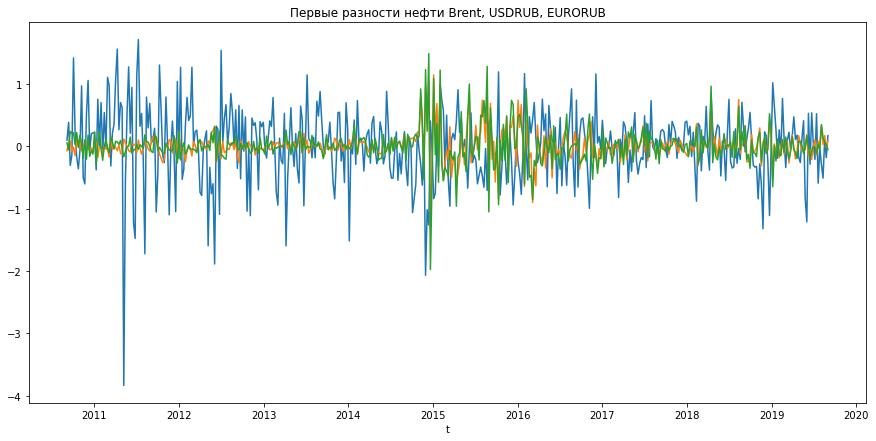

In [92]:
plt.figure( figsize=( 15, 7 ))
plt.plot(df_fc_w.index,df_fc_w)
plt.xlabel('t')
plt.title('Первые разности нефти Brent, USDRUB, EURORUB')
plt.show()

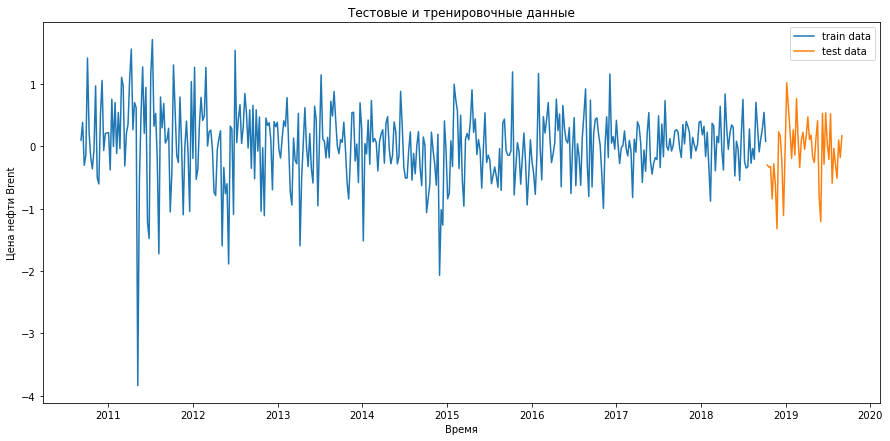

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('DATE') <= split_date].copy(), \
           data.loc[data.index.get_level_values('DATE') >  split_date].copy()

train_b, test_b = split_data_b( df_fc_w, '10-10-2018')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df_fc_w.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df_fc_w.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цена нефти Brent')
plt.plot(train_b.index.get_level_values('DATE'),train_b[df_fc_w.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('DATE'),test_b[df_fc_w.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()

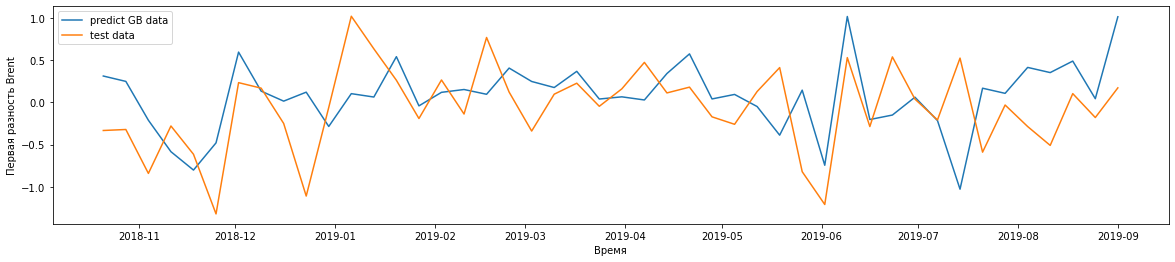

ошибка градиентного бустинга :   147.1697584315792 %


In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Первая разность Brent')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Ошибки предсказания ряда первых разностей в сравнении с прямым прогнозированием выше